*Francisco Pereira [camara@dtu.dk], DTU Management*

*Bojan Kostic [boko@dtu.dk], DTU Management*

Notebook adapted from: https://square.github.io/pysurvival/tutorials/churn.html

# Advanced Business Analytics

## <span style="color:red">Survival Analysis</span>

---

## *Churn prediction - predicting when your customers will churn*

In [1]:
!pip install pysurvival

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\bjark\Anaconda3\envs\BjarkiLord\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\bjark\\AppData\\Local\\Temp\\pip-install-yo3eyl6o\\pysurvival\\setup.py'"'"'; __file__='"'"'C:\\Users\\bjark\\AppData\\Local\\Temp\\pip-install-yo3eyl6o\\pysurvival\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\bjark\AppData\Local\Temp\pip-wheel-qji88uxp'
       cwd: C:\Users\bjark\AppData\Local\Temp\pip-install-yo3eyl6o\pysurvival\
  Complete output (108 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\pysurvival
  copying pysurvival\__init__.py -> build\lib.win-amd64-3.7\pysurvival
  creating build\lib.win-amd64-3.7\pysurvival\datasets
  copying py


  Using cached pysurvival-0.1.2.tar.gz (4.7 MB)
  Running setup.py clean for pysurvival
Failed to build pysurvival
    Running setup.py install for pysurvival: started
    Running setup.py install for pysurvival: finished with status 'error'


    running egg_info
    writing pysurvival.egg-info\PKG-INFO
    writing dependency_links to pysurvival.egg-info\dependency_links.txt
    writing requirements to pysurvival.egg-info\requires.txt
    writing top-level names to pysurvival.egg-info\top_level.txt
    adding license file 'LICENSE.txt' (matched pattern 'LICEN[CS]E*')
    reading manifest file 'pysurvival.egg-info\SOURCES.txt'
    reading manifest template 'MANIFEST.in'
    writing manifest file 'pysurvival.egg-info\SOURCES.txt'
    copying pysurvival\.DS_Store -> build\lib.win-amd64-3.7\pysurvival
    creating build\lib.win-amd64-3.7\pysurvival\cpp_extensions
    copying pysurvival\cpp_extensions\_coxph.cpp -> build\lib.win-amd64-3.7\pysurvival\cpp_extensions
    copying pysurvival\cpp_extensions\_functions.cpp -> build\lib.win-amd64-3.7\pysurvival\cpp_extensions
    copying pysurvival\cpp_extensions\_metrics.cpp -> build\lib.win-amd64-3.7\pysurvival\cpp_extensions
    copying pysurvival\cpp_extensions\_non_parametric.cpp -

---

## <span style="color:#3498DB">1. Introduction</span>

[Customer churn/attrition](https://en.wikipedia.org/wiki/Customer_attrition), a.k.a [the percentage of customers that stop using a company's products or services](https://blog.hubspot.com/service/what-is-customer-churn), is one of the most important metrics for a business, as it usually costs more to acquire new customers than it does to retain existing ones.

Indeed, according to a [study by Bain & Company](http://www2.bain.com/Images/BB_Prescription_cutting_costs.pdf), existing customers tend to buy more from a company over time, thus reducing the operating costs of the business and may refer the products they use to others. For example, in financial services, a 5% increase in customer retention produces more than a 25% increase in profit.

By using survival analysis, not only companies can predict if customers are likely to stop doing business but also when that event might happen.

---

## <span style="color:#3498DB">2. Setup</span>

A software as a service (SaaS) company provides a suite of products for small-to-medium enterprises, such as data storage, accounting, travel and expenses management as well as payroll management.

So as to help the CFO forecast the acquisition and marketing costs for the next fiscal year, the Data Science team wants to build a churn model to predict when customers are likely to stop their monthly subscription. Thus, once customers have been flagged as likely to churn within a certain time window, the company could take the necessary retention actions.

---

## <span style="color:#3498DB">3. Dataset</span>

The dataset the team wants to use contains the following features:

<img src="dataset_customer_churn.png" width=700>

### 3.1. Description and overview

In [6]:
# Import modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from pysurvival.datasets import Dataset

ModuleNotFoundError: No module named 'pysurvival'

In [3]:
# Load the dataset
raw_dataset = Dataset('churn').load()

NameError: name 'Dataset' is not defined

In [3]:
# Print dataset size
print('The raw_dataset has the following shape: {}'.format(raw_dataset.shape))
print('{:<16} {}'.format('No. of samples:', raw_dataset.shape[0]))
print('{:<16} {}'.format('No. of features:', raw_dataset.shape[1]))

The raw_dataset has the following shape: (2000, 14)
No. of samples:  2000
No. of features: 14


It's time to inspect the dataset. There are several very useful commands to get basic idea about the dataset, summary statistics or to assess the type of variables we're dealing with, such as `head()`, `info()` or `describe()`. Use them. What does it tell you about the dataset?

In [4]:
raw_dataset.head()

,product_data_storage,product_travel_expense,product_payroll,product_accounting,csat_score,articles_viewed,smartphone_notifications_viewed,marketing_emails_clicked,social_media_ads_viewed,minutes_customer_support,company_size,us_region,months_active,churned
0,2048,Free-Trial,Active,No,9,4,0,14,1,8.3,10-50,West North Central,3.0,1.0
1,2048,Free-Trial,Free-Trial,Active,9,4,2,12,1,0.0,100-250,South Atlantic,2.0,1.0
2,2048,Active,Active,Active,9,3,2,17,1,0.0,100-250,East South Central,7.0,0.0
3,500,Active,Free-Trial,No,10,0,0,14,0,0.0,50-100,East South Central,8.0,1.0
4,5120,Free-Trial,Active,Free-Trial,8,5,0,17,0,0.0,50-100,East North Central,7.0,0.0


In [5]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   product_data_storage             2000 non-null   int64  
 1   product_travel_expense           2000 non-null   object 
 2   product_payroll                  2000 non-null   object 
 3   product_accounting               2000 non-null   object 
 4   csat_score                       2000 non-null   int64  
 5   articles_viewed                  2000 non-null   int64  
 6   smartphone_notifications_viewed  2000 non-null   int64  
 7   marketing_emails_clicked         2000 non-null   int64  
 8   social_media_ads_viewed          2000 non-null   int64  
 9   minutes_customer_support         2000 non-null   float64
 10  company_size                     2000 non-null   object 
 11  us_region                        2000 non-null   object 
 12  months_active       

In [6]:
raw_dataset.describe()

,product_data_storage,csat_score,articles_viewed,smartphone_notifications_viewed,marketing_emails_clicked,social_media_ads_viewed,minutes_customer_support,months_active,churned
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1400.096000,8.97800,3.992000,0.384500,16.168500,0.379000,2.402250,3.879500,0.466000
std,1209.636442,0.97262,1.921141,0.599032,3.078286,0.554538,6.661963,2.390782,0.498967
min,100.000000,5.00000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,500.000000,8.00000,3.000000,0.000000,14.000000,0.000000,0.000000,2.000000,0.000000
50%,1024.000000,9.00000,4.000000,0.000000,16.000000,0.000000,0.000000,3.000000,0.000000
75%,2048.000000,10.00000,5.000000,1.000000,18.000000,1.000000,0.000000,5.000000,1.000000
max,5120.000000,10.00000,14.000000,3.000000,26.000000,2.000000,57.700000,12.000000,1.000000


### 3.2. Features and labels

As we can see from running `info()` command, there are 14 columns in the dataset: 12 feature columns and 2 label columns.

#### 3.2.1. Labels/dependent variables: time-to-event (TTE) and event indicator

The first thing we need to do in survival analysis is to define variables describing survival times and censorship indication, which are:

* `months_active`
* `churned`

As we are using DataFrame structure, let's just define column names storing these data and call them `time_column` and `event_column`. As it can be see from the previous table, *time* is stored in the *months_active* column and *event* is stored in the *churned* column.

In [7]:
# Define the time and event columns
time_column = 'months_active'
event_column = 'churned'

#### 3.2.2. Features/independent variables: numerical and categorical

There are 7 numerical features:

* `product_data_storage`
* `csat_score`
* `articles_viewed`
* `smartphone_notifications_viewed`
* `marketing_emails_clicked`
* `social_media_ads_viewed`
* `minutes_customer_support`

and 5 categorical features:

* `product_travel_expense`
* `product_payroll`
* `product_accounting`
* `us_region`
* `company_size`

in our dataset. Let's do the following:

* define a list of categorical features, storing it in the `category_columns` variable;
* cast categorical features from *string* (*object*) to *category* data type;
* encode the categorical variables as one-hot vectors using pandas `get_dummies` method (set `drop_first` argument to `True`), storing it in the `dataset` variable;
* define a list of the modeling features as `features`.

In [8]:
# Categorical features
category_columns = ['product_travel_expense',
                    'product_payroll',
                    'product_accounting',
                    'us_region',
                    'company_size']

In [9]:
# Cast categorical features from 'string' to 'category' data type
for col in category_columns:
    raw_dataset[col] = raw_dataset[col].astype('category')

In [10]:
# Encode the categorical variables as one-hot vectors
dataset = pd.get_dummies(raw_dataset, columns=category_columns, drop_first=True)

In [11]:
# Define a list of the modeling features
features = np.setdiff1d(dataset.columns, [time_column, event_column]).tolist()

Compare datasets before and after one-hot encoding.

In [12]:
raw_dataset.head()

,product_data_storage,product_travel_expense,product_payroll,product_accounting,csat_score,articles_viewed,smartphone_notifications_viewed,marketing_emails_clicked,social_media_ads_viewed,minutes_customer_support,company_size,us_region,months_active,churned
0,2048,Free-Trial,Active,No,9,4,0,14,1,8.3,10-50,West North Central,3.0,1.0
1,2048,Free-Trial,Free-Trial,Active,9,4,2,12,1,0.0,100-250,South Atlantic,2.0,1.0
2,2048,Active,Active,Active,9,3,2,17,1,0.0,100-250,East South Central,7.0,0.0
3,500,Active,Free-Trial,No,10,0,0,14,0,0.0,50-100,East South Central,8.0,1.0
4,5120,Free-Trial,Active,Free-Trial,8,5,0,17,0,0.0,50-100,East North Central,7.0,0.0


In [13]:
dataset.head()

,product_data_storage,csat_score,articles_viewed,smartphone_notifications_viewed,marketing_emails_clicked,social_media_ads_viewed,minutes_customer_support,months_active,churned,product_travel_expense_Free-Trial,...,us_region_Mountain,us_region_New England,us_region_Pacific,us_region_South Atlantic,us_region_West North Central,us_region_West South Central,company_size_10-50,company_size_100-250,company_size_50-100,company_size_self-employed
0,2048,9,4,0,14,1,8.3,3.0,1.0,1,...,0,0,0,0,1,0,1,0,0,0
1,2048,9,4,2,12,1,0.0,2.0,1.0,1,...,0,0,0,1,0,0,0,1,0,0
2,2048,9,3,2,17,1,0.0,7.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,500,10,0,0,14,0,0.0,8.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
4,5120,8,5,0,17,0,0.0,7.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0


What would happen if `drop_first` is set to `False`?

In [14]:
pd.get_dummies(raw_dataset, columns=category_columns, drop_first=True)

,product_data_storage,csat_score,articles_viewed,smartphone_notifications_viewed,marketing_emails_clicked,social_media_ads_viewed,minutes_customer_support,months_active,churned,product_travel_expense_Free-Trial,...,us_region_Mountain,us_region_New England,us_region_Pacific,us_region_South Atlantic,us_region_West North Central,us_region_West South Central,company_size_10-50,company_size_100-250,company_size_50-100,company_size_self-employed
0,2048,9,4,0,14,1,8.3,3.0,1.0,1,...,0,0,0,0,1,0,1,0,0,0
1,2048,9,4,2,12,1,0.0,2.0,1.0,1,...,0,0,0,1,0,0,0,1,0,0
2,2048,9,3,2,17,1,0.0,7.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,500,10,0,0,14,0,0.0,8.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
4,5120,8,5,0,17,0,0.0,7.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1024,9,3,0,19,1,0.4,8.0,0.0,1,...,1,0,0,0,0,0,0,0,1,0
1996,1024,7,3,0,15,0,0.0,2.0,1.0,1,...,0,0,0,0,0,0,0,0,1,0
1997,500,8,5,0,15,0,5.9,1.0,1.0,1,...,0,0,0,0,1,0,1,0,0,0
1998,500,10,6,1,15,1,3.3,3.0,1.0,1,...,0,0,1,0,0,0,0,1,0,0


In [15]:
pd.get_dummies(raw_dataset, columns=category_columns, drop_first=False)

,product_data_storage,csat_score,articles_viewed,smartphone_notifications_viewed,marketing_emails_clicked,social_media_ads_viewed,minutes_customer_support,months_active,churned,product_travel_expense_Active,...,us_region_New England,us_region_Pacific,us_region_South Atlantic,us_region_West North Central,us_region_West South Central,company_size_1-10,company_size_10-50,company_size_100-250,company_size_50-100,company_size_self-employed
0,2048,9,4,0,14,1,8.3,3.0,1.0,0,...,0,0,0,1,0,0,1,0,0,0
1,2048,9,4,2,12,1,0.0,2.0,1.0,0,...,0,0,1,0,0,0,0,1,0,0
2,2048,9,3,2,17,1,0.0,7.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
3,500,10,0,0,14,0,0.0,8.0,1.0,1,...,0,0,0,0,0,0,0,0,1,0
4,5120,8,5,0,17,0,0.0,7.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1024,9,3,0,19,1,0.4,8.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1996,1024,7,3,0,15,0,0.0,2.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
1997,500,8,5,0,15,0,5.9,1.0,1.0,0,...,0,0,0,1,0,0,1,0,0,0
1998,500,10,6,1,15,1,3.3,3.0,1.0,0,...,0,1,0,0,0,0,0,1,0,0


---

## <span style="color:#3498DB">4. Exploratory data analysis</span>

Let's perform an exploratory data analysis (EDA), so as to understand what the data look like and start answering interesting questions about our problem.

### 4.1. Null values and duplicates

The first thing to do is checking if the `raw_dataset` contains `Null` values and has duplicated rows.

In [16]:
# Check for Null values
N_null = sum(dataset[features].isnull().sum())
print('The raw_dataset contains {} null values.'.format(N_null))

# Remove duplicates, if any
N_dupli = sum(dataset.duplicated(keep='first'))
dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)
print('The dataset contains {} duplicates.'.format(N_dupli))

# Number of samples in the dataset
N = dataset.shape[0]

The raw_dataset contains 0 null values.
The dataset contains 0 duplicates.


As it turns out the dataset doesn't have any `Null` values or duplicates.

### 4.2. Visual exploration and statistics

Let's check out/visualize the feature statistics.

#### 4.2.1. Numerical features

We will display the boxplot and histogram of each feature.

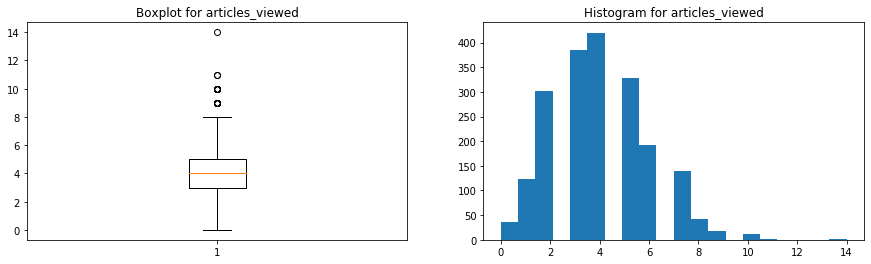

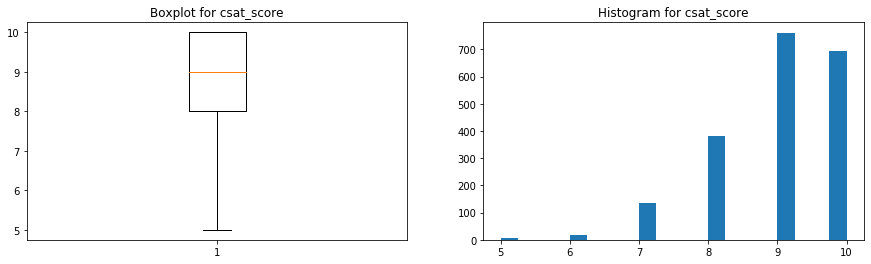

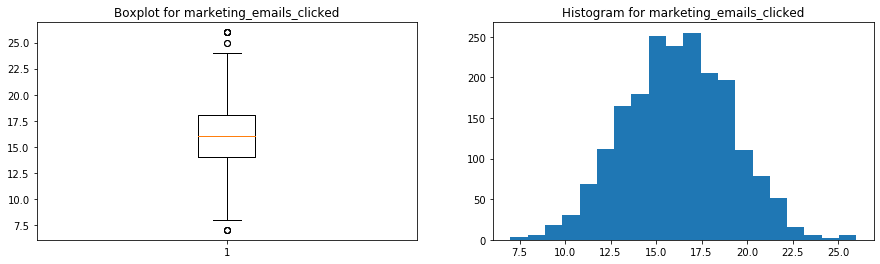

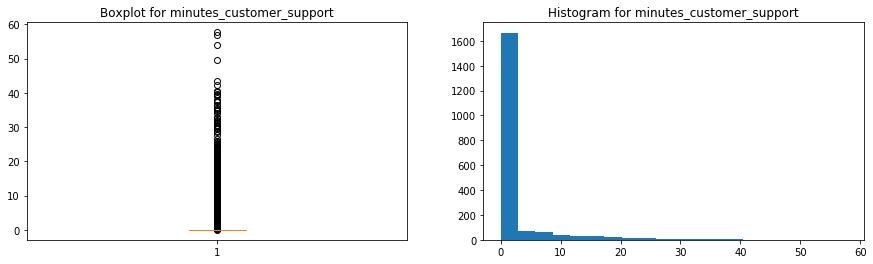

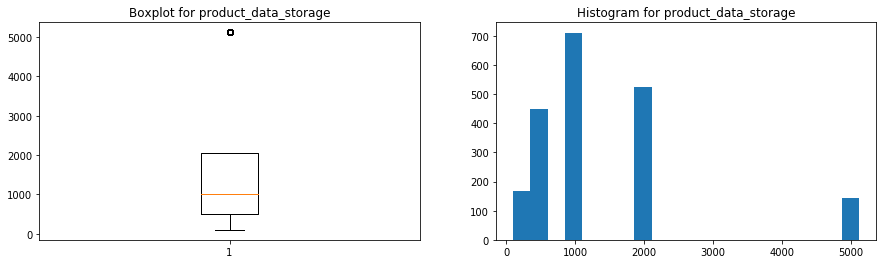

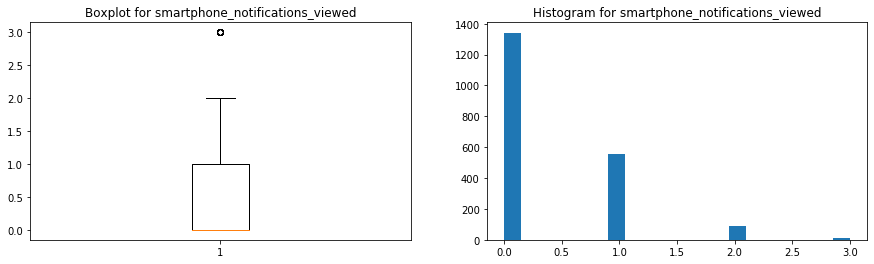

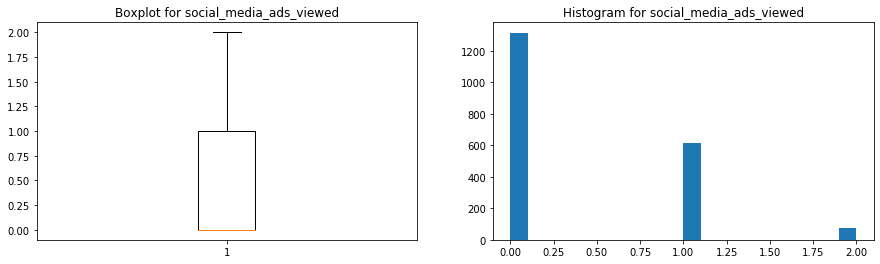

In [17]:
num_features = np.setdiff1d([col for col in raw_dataset.columns if raw_dataset[col].dtype.name != 'category'],
                            [time_column, event_column]).tolist()

for feature in num_features:

    # Creating an empty chart
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 4))

    # Extracting the feature values
    x = dataset[feature].values

    # Boxplot
    ax1.boxplot(x)
    ax1.set_title('Boxplot for {}'.format(feature))

    # Histogram
    ax2.hist(x, bins=20)
    ax2.set_title('Histogram for {}'.format(feature))

    # Display
    plt.show()

#### 4.2.2. Categorical features

We will display the occurrences of the categories in a barchart for each feature.

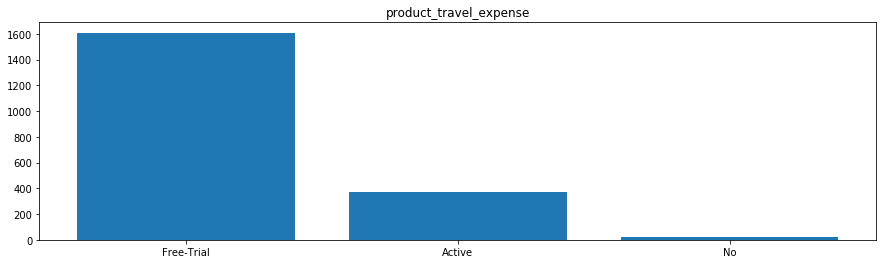

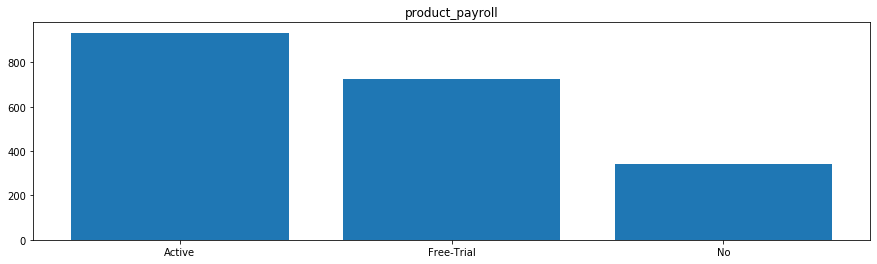

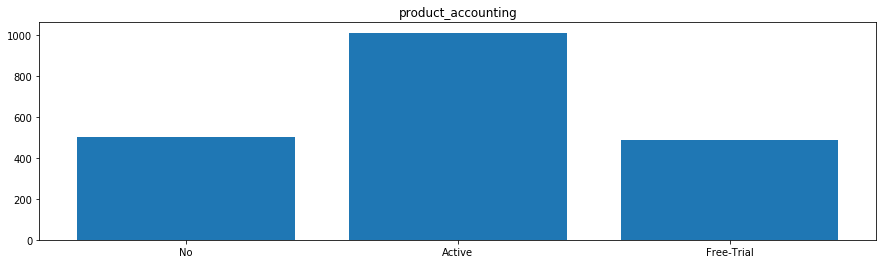

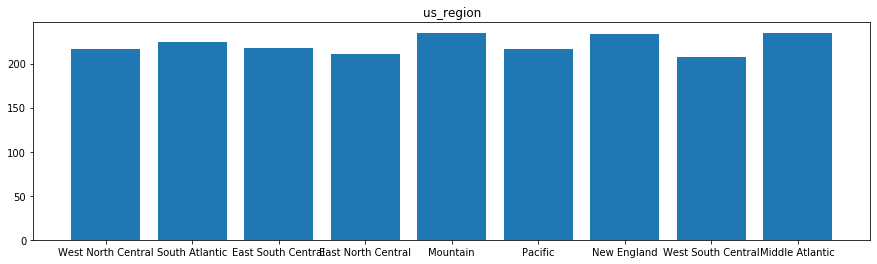

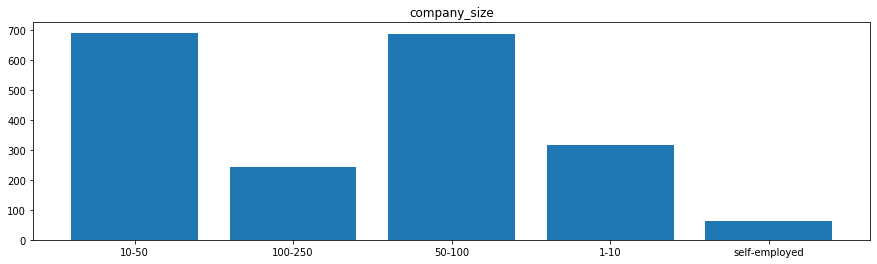

In [18]:
from collections import Counter

for feature in category_columns:
    
    # Create an empty chart
    fig, ax = plt.subplots(figsize=(15, 4))
    
    # Extract the feature values
    x = raw_dataset[feature].values
    
    # Count the number of occurrences for each category
    data = Counter(x)
    category = list(data.keys())
    counts = list(data.values())
    
    # Barchart
    ax.bar(category, counts)
    
    # Display
    plt.title(feature)
    plt.show()

#### 4.2.3. Time & Event

We will display the occurrences of event and censorship, as well as the distribution of the time output variable for both situations.

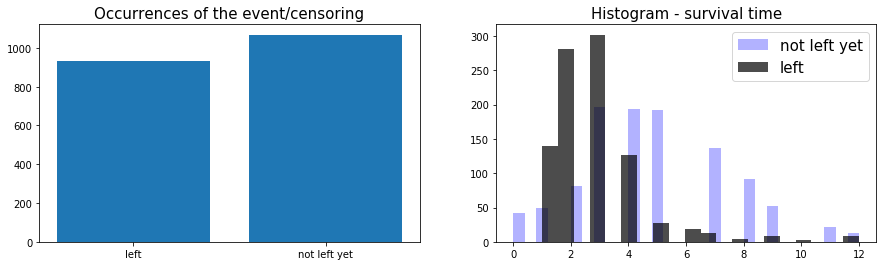

In [19]:
# Create an empty chart
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 4))

# Count the number of occurrences for each category 
data = Counter(raw_dataset[event_column].replace({0: 'not left yet', 1: 'left'}))
category = list(data.keys())
counts = list(data.values())
idx = range(len(counts))

# Display the occurrences of the event/censoring
ax1.bar(idx, counts)
ax1.set_xticks(idx)
ax1.set_xticklabels(category)
ax1.set_title('Occurrences of the event/censoring', fontsize=15)

# Show the histogram of the survival times for the censoring
time_0 = raw_dataset.loc[raw_dataset[event_column] == 0, time_column]
ax2.hist(time_0, bins=30, alpha=0.3, color='blue', label='not left yet')

# Show the histogram of the survival times for the events
time_1 = raw_dataset.loc[ raw_dataset[event_column] == 1, time_column]
ax2.hist(time_1, bins=20, alpha=0.7, color='black', label='left')
ax2.set_title('Histogram - survival time', fontsize=15)

# Display everything side-by-side
plt.legend(fontsize=15)
plt.show()

### 4.3. Correlations

Let's compute and visualize the correlation between the features.

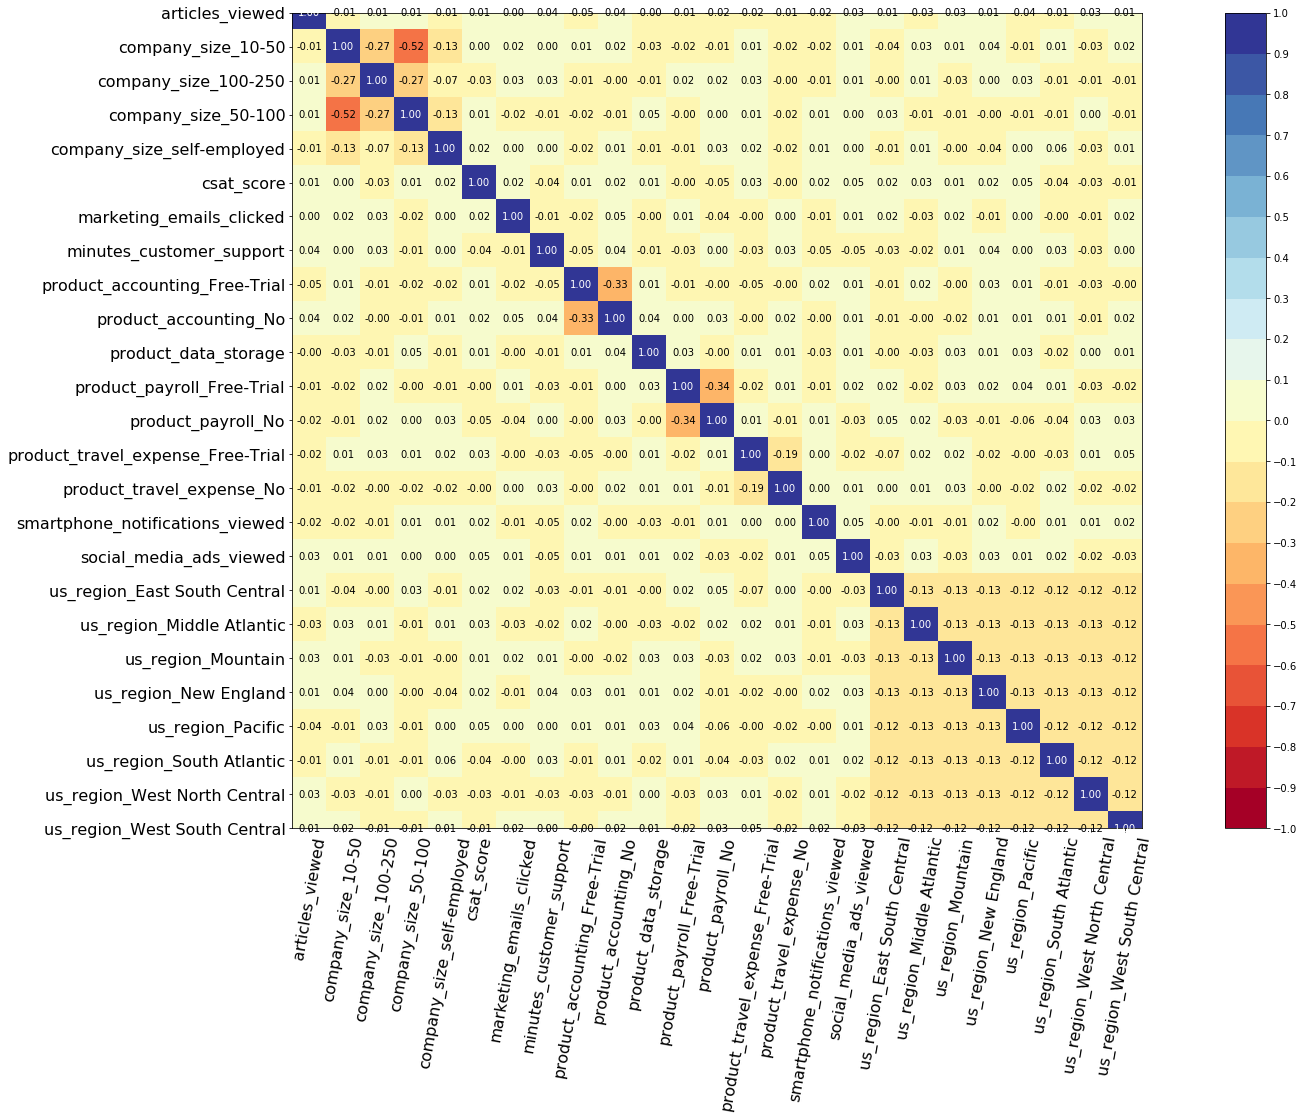

In [20]:
# Import
from pysurvival.utils.display import correlation_matrix

# Calculate and display correlations
correlation_matrix(dataset[features], figure_size=(30, 15), text_fontsize=10)

As we can see, there aren't any alarming correlations, so we will not remove any feature.

---

## <span style="color:#3498DB">5. Preparation</span>

### 5.1. Splitting between training and test data

So as to perform cross-validation later on and assess the performances of the model, let's split the dataset into training and testing sets. We need to define `X`, `T` and `E` for train and test.

In [21]:
# Build train and test sets
from sklearn.model_selection import train_test_split

index_train, index_test = train_test_split(range(N), test_size=0.35)
data_train = dataset.loc[index_train].reset_index(drop=True)
data_test = dataset.loc[index_test].reset_index(drop=True)

# Creating the X, T and E inputs
X_train, X_test = data_train[features], data_test[features]
T_train, T_test = data_train[time_column], data_test[time_column]
E_train, E_test = data_train[event_column], data_test[event_column]

### 5.2. Performance metrics

In order to assess the model performance, we previously split the original dataset into training and test sets, so that we can compute its performance metrics on the test set.

#### 5.2.1. Concordance index (C-index)

The [C-index](https://square.github.io/pysurvival/metrics/c_index.html) represents the global assessment of the model discrimination power: ***this is the model’s ability to correctly provide a reliable ranking of the survival times based on the individual risk scores***. In general, when the C-index is close to 1, the model has an almost perfect discriminatory power; but when it is close to 0.5, it has no ability to discriminate between low and high risk subjects.

In [22]:
# Import
from pysurvival.utils.metrics import concordance_index

#### 5.2.2. Brier score

The [Brier score](https://square.github.io/pysurvival/metrics/brier_score.html) ***measures the average discrepancies between the status and the estimated probabilities at a given time***. Thus, the lower the score (usually below 0.25), the better the predictive performance. To assess the overall error measure across multiple time points, the Integrated Brier Score (IBS) is usually computed as well.

In [23]:
# Import
from pysurvival.utils.display import integrated_brier_score

---

## <span style="color:#3498DB">6. Modeling</span>

<div style="background-color:lightblue">
Let's now fit and validate several survival models, and compare their predictive capacity. Let's do the following steps for every model:

* Import the model
* Initialize the model
* Check feature scaling in the model
* Fit the model
* Check the model
* Validate the model - calculate C-index and IBS for training and test sets

We will try out the following models:

* **Extra Survival Trees** (XST) model

Try also other models, such as **Survival Support Vector Machines**, **Random Survival Forests**, etc., and also hyper-parameters to find the best model.
</div>

### 6.1. Building a [Extra Survival Trees](https://square.github.io/pysurvival/models/extra_survival_trees.html) model

Let's now fit an Extra Survival Trees model to the training set. 

*Note: The choice of the model and hyper-parameters was obtained using grid-search selection, not displayed in this tutorial.*

In [24]:
# Import estimator
from pysurvival.models.survival_forest import ExtraSurvivalTreesModel

In [25]:
# Initialize the Extra Survival Trees model with 200 trees
xst = ExtraSurvivalTreesModel(num_trees=200) 

In [26]:
# Fit the model
xst.fit(X_train, T_train, E_train,
        max_features='sqrt',
        max_depth=5,
        min_node_size=20,
        num_random_splits=200)

ExtraSurvivalTreesModel

In [27]:
# Check the model
print('Model name: {}'.format(xst.name))

Model name: ExtraSurvivalTreesModel


In [28]:
# Print C-index
print('C-index: {:.3f}'.format(concordance_index(xst, X_train, T_train, E_train)))
print('C-index: {:.3f}'.format(concordance_index(xst, X_test, T_test, E_test)))

C-index: 0.852
C-index: 0.862


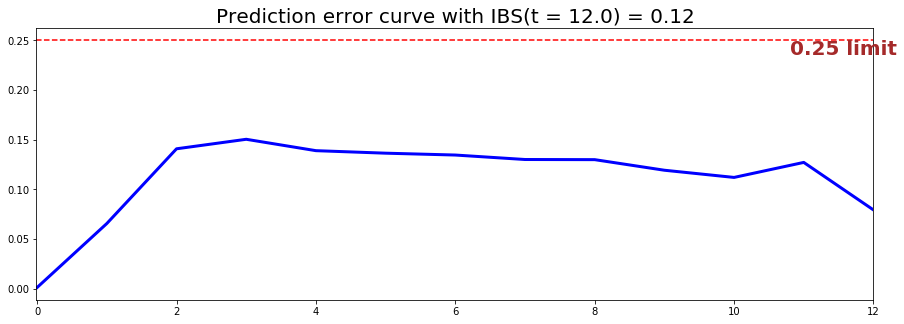

IBS: 0.119


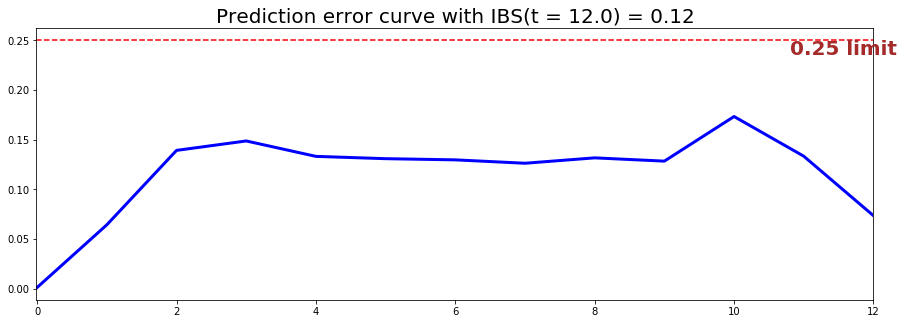

IBS: 0.123


In [29]:
# Print IBS
print('IBS: {:.3f}'.format(integrated_brier_score(xst, X_train, T_train, E_train, t_max=12, figure_size=(15, 5))))
print('IBS: {:.3f}'.format(integrated_brier_score(xst, X_test, T_test, E_test, t_max=12, figure_size=(15, 5))))

The IBS is equal to 0.12 on the entire model time axis. This indicates that the model will have good predictive abilities.

### 6.2. Variables importance

Having built a Survival Forest model allows us to compute the features importance:

In [30]:
# Computing variables importance
xst.variable_importance_table.head(5)

,feature,importance,pct_importance
0,csat_score,21.695890,0.212127
1,product_payroll_No,19.536844,0.191017
2,product_accounting_No,14.505103,0.141821
3,product_data_storage,7.591589,0.074225
4,minutes_customer_support,7.451689,0.072857


Thanks to the feature importance, we get a better understanding of what drives retention or churn. Here, the Accounting and Payroll Management products, score on the satisfaction survey as well as the amount of time spent on the phone with customer support play a primordial role.

*Note: The importance is the difference in prediction error between the perturbed and unperturbed error rate as depicted by [Breiman et al.](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)*

---

## <span style="color:#3498DB">7. Predictions</span>

### 7.1. Overall predictions

Now that we have built a model that seems to provide great performances, let's compare the time series of the actual and predicted number of customers who stop doing business with the SaaS company, for each time $ t $.

In [31]:
# Import
from pysurvival.utils.display import compare_to_actual

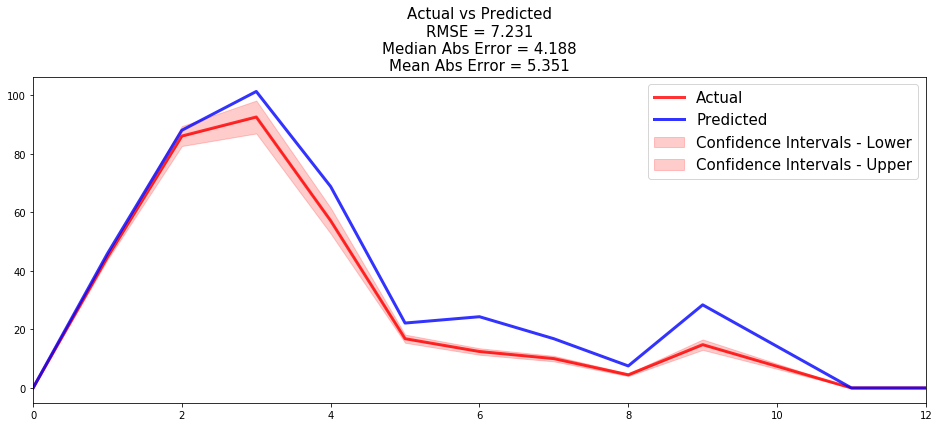

In [32]:
results = compare_to_actual(xst, X_test, T_test, E_test,
                            is_at_risk=False,
                            figure_size=(16, 6),
                            metrics=['rmse', 'mean', 'median'])

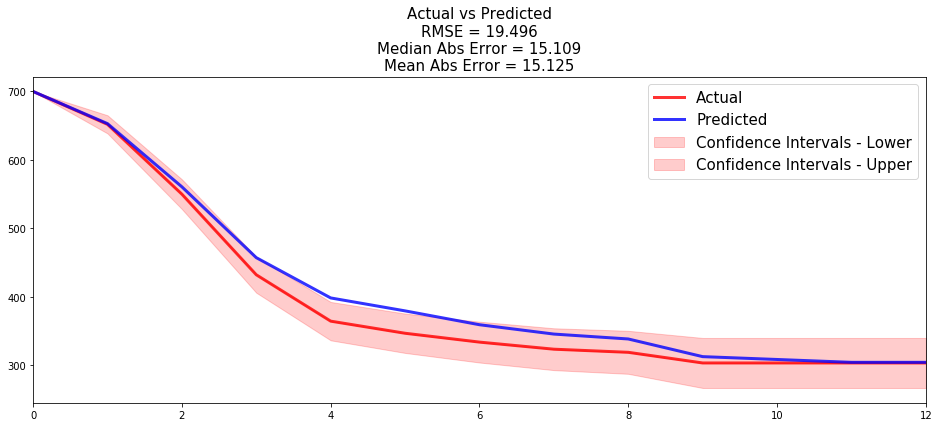

In [33]:
results = compare_to_actual(xst, X_test, T_test, E_test,
                            is_at_risk=True,
                            figure_size=(16, 6),
                            metrics=['rmse', 'mean', 'median'])

The model provides very good results overall as on an entire 12 months window, it only makes an average absolute error of ~7 customers.

### 7.2. Individual predictions

Now that we know that we can provide reliable predictions for an entire cohort, let's compute the probability of remaining a customer for all times $ t $.

First, we can construct the risk groups based on risk scores distribution. The helper function `create_risk_groups`, which can be found in `pysurvival.utils.display`, will help us do that:

In [34]:
# Import
from pysurvival.utils.display import create_risk_groups

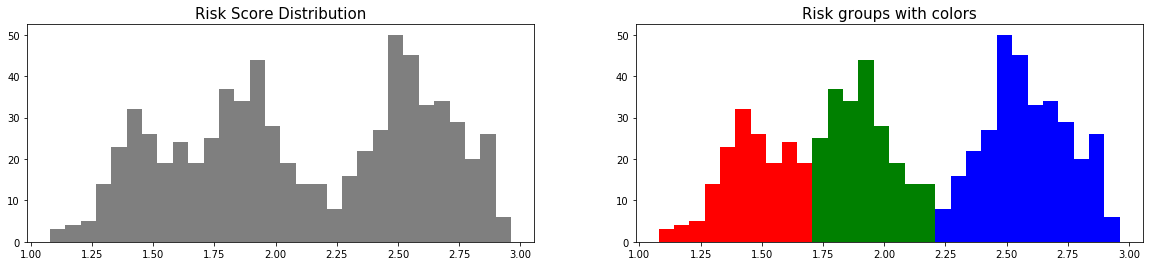

In [35]:
# Create risk groups
risk_groups = create_risk_groups(model=xst, X=X_test,
                                 use_log=True,
                                 num_bins=30,
                                 figure_size=(20, 4),
                                 low={'lower_bound': 0., 'upper_bound': 1.65, 'color': 'red'},
                                 medium={'lower_bound': 1.65, 'upper_bound': 2.2, 'color': 'green'},
                                 high={'lower_bound': 2.2, 'upper_bound': 3., 'color': 'blue'})

*Note: The current choice of the lower and upper bounds for each group is based on my intuition; so feel free to change the values so as to match your situation instead.*

Here, it is possible to distinguish 3 main groups: **low**, **medium** and **high** risk groups. Because the C-index is high, the model will be able to rank the survival times of a random unit of each group, such that $ t_{high} \leq t_{medium} \leq t_{low} $.

Let's randomly select individual unit in each group and compare their likelihood to remain a customer. To demonstrate our point, we will purposely select units which experienced an event to visualize the actual time of event.

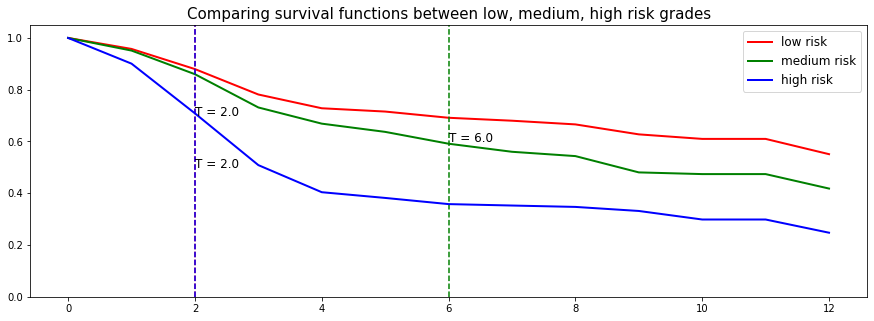

In [36]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(15, 5))

# Select a random individual that experienced an event from each group
groups = []
for i, (label, (color, indexes)) in enumerate(risk_groups.items()):

    # Select the individuals that belong to this group
    if len(indexes) == 0:
        continue
    X = X_test.values[indexes, :]
    T = T_test.values[indexes]
    E = E_test.values[indexes]

    # Randomly extract an individual that experienced an event
    choices = np.argwhere((E == 1.)).flatten()
    if len(choices) == 0:
        continue
    k = np.random.choice(choices, 1)[0]

    # Save the time of event
    t = T[k]

    # Compute the survival function for all times t
    survival = xst.predict_survival(X[k, :]).flatten()

    # Display the functions
    label_ = '{} risk'.format(label)
    ax.plot(xst.times, survival, color=color, label=label_, lw=2.)
    groups.append(label)

    # Actual time
    ax.axvline(x=t, color=color, ls='--')
    ax.annotate('T = {:.1f}'.format(t),
                xy=(t, 0.5 * (1. + 0.2 * i)),
                xytext=(t, 0.5 * (1. + 0.2 * i)),
                fontsize=12)

# Show everything
groups_str = ', '.join(groups)
title = 'Comparing survival functions between {} risk grades'.format(groups_str)
ax.set_title(title, fontsize=15)
ax.set_ylim(0., 1.05)
ax.legend(fontsize=12)
# plt.show()

Here, we can see that the model manages to provide a great prediction of the event time.

---

## <span style="color:#3498DB">8. Conclusion</span>

In conclusion, we can see that it is possible to predict when customers will stop doing business with the company at different time points. The model will help the company be more pro-active when it comes to retaining their customers; and provide a better understanding of the reasons that drive churn.

We can now save our model so as to put it in production and score future customers.

In [37]:
# Let's now save our model
from pysurvival.utils import save_model

# Model path
model_path = '/Users/boko/Desktop/churn_csf.zip'

# Store the model to hard drive
save_model(xst, model_path)

Saving the model to disk as /Users/boko/Desktop/churn_csf.zip


To use the previously saved model, we just need to load it and start making predictions!

In [38]:
# from pysurvival.utils import load_model

# survival_model = load_model(model_path)

---

## <span style="color:#3498DB">References</span>

* https://square.github.io/pysurvival/tutorials/churn.html
* [Churn definition from hubspot.com](https://blog.hubspot.com/service/what-is-customer-churn)
* [Bain & Company - Prescription for cutting costs](http://www2.bain.com/Images/BB_Prescription_cutting_costs.pdf)
* [Random Forests. Machine Learning, 45(1), 5-32](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)